In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.utils import resample
from scipy import stats
from sklearn.preprocessing import MinMaxScaler as scaler

In [3]:
cd=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv') #importing the dataset

In [4]:
cd.head() #exploring the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
cd.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True) #dropping uneccessary columns

In [6]:
cd.describe() #describing the dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
cd.dtypes #checking the datatypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
cd.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
cd['Gender'].value_counts() #counting the no of values in the column

Male      5457
Female    4543
Name: Gender, dtype: int64

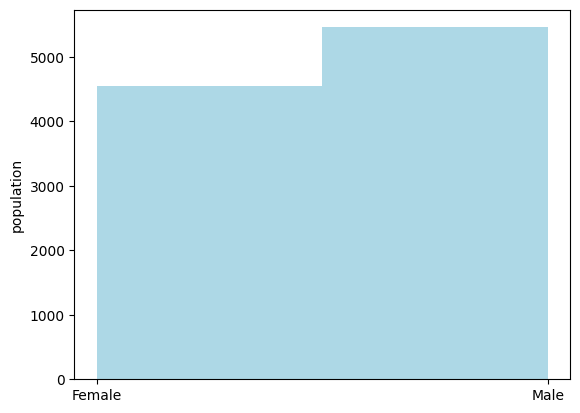

In [82]:
#plotting a graph for gender population
plt.hist(cd['Gender'],bins=2,color='lightblue')
plt.ylabel('population')
plt.show()

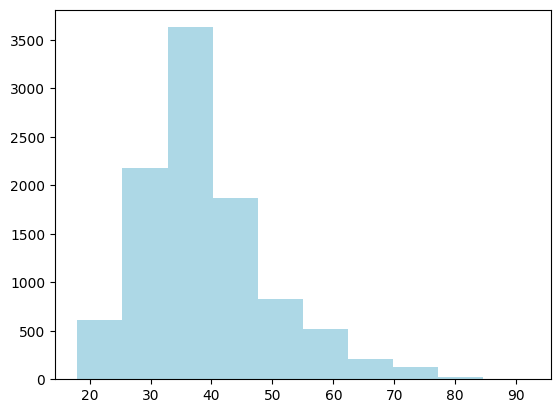

In [11]:
plt.hist(cd['Age'], color='lightblue'); #plotting a histogram for age

In [12]:
#counting the population based on geography
d=cd['Geography'].value_counts()
d

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

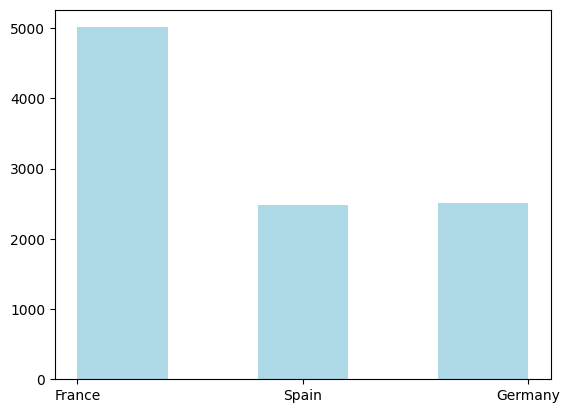

In [13]:
plt.hist(cd['Geography'],bins=5,color='lightblue'); #plotting a histogram for the population based on geography

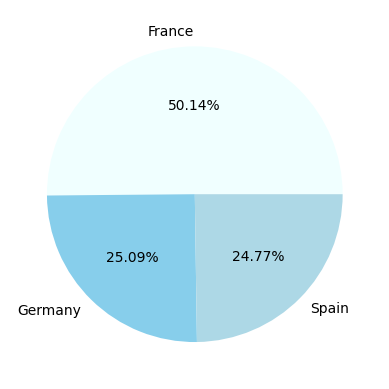

In [14]:
#plotting the chart for population based on geography
plt.pie(cd['Geography'].value_counts(), colors=['azure','skyblue','lightblue'], shadow=False,
       labels=['France','Germany','Spain'],
       autopct='%1.2f%%');

In [15]:
#calculating exit population based on geography
a = len(cd[(cd['Geography']=='France') & (cd['Exited']==1)])
b = len(cd[(cd['Geography']=='Germany') & (cd['Exited']==1)])
c = len(cd[(cd['Geography']=='Spain') & (cd['Exited']==1)])
print('Exited from France',a,'which is',a/d[0]*100,'%')
print('Exited from Germany',b,'which is',b/d[1]*100,'%')
print('Exited from Spain',c,'which is',c/d[2]*100,'%')

Exited from France 810 which is 16.15476665337056 %
Exited from Germany 814 which is 32.44320446392985 %
Exited from Spain 413 which is 16.673395236172787 %


In [16]:
cd_other = cd[cd['Geography']!='France']
len(cd_other)

4986

In [17]:
cd_france = cd[cd['Geography']=='France']
len(cd_france)

5014

In [18]:
cd_france = resample(cd_france, replace=False,
                     n_samples=int(np.mean([len(cd[cd['Geography']=='Germany']),len(cd[cd['Geography']=='Spain'])])))
len(cd_france)

2493

In [84]:
#cd = pd.concat([cd_other,cd_france])
#cd.groupby('Geography').size().plot(kind='pie', autopct='%1.2f%%');

In [20]:
g = cd['HasCrCard'].value_counts()
g

1    7055
0    2945
Name: HasCrCard, dtype: int64

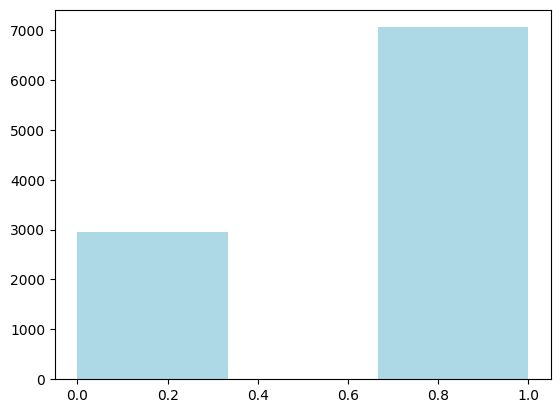

In [21]:
plt.hist(cd['HasCrCard'], bins=3, color='lightblue');

In [22]:
e = len(cd[(cd['HasCrCard']==1) & (cd['Exited']==1)])
f = len(cd[(cd['HasCrCard']==0) & (cd['Exited']==1)])
print('Exited having a credit card is',e,'which is',e/g[0]*100,'%')
print('Exited without having a credit card is',f,'which is',f/g[1]*100,'%')

Exited having a credit card is 1424 which is 48.35314091680815 %
Exited without having a credit card is 613 which is 8.688873139617293 %


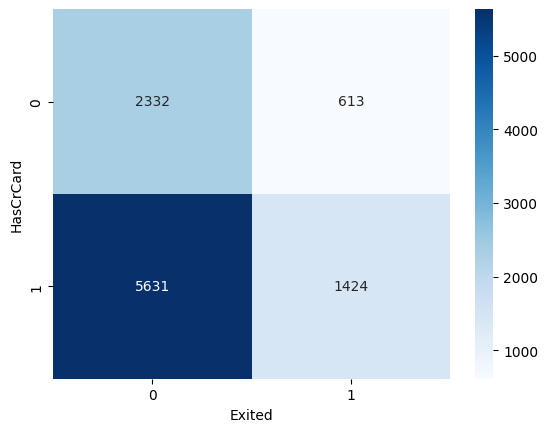

In [71]:
sb.heatmap(pd.crosstab(cd['HasCrCard'], cd['Exited']), annot=True, fmt='g', cmap='Blues'); #the fmt parameter is used to format
                                                                             #the annotations from scientific
                                                                             #notation to integers.

In [24]:
h = cd['IsActiveMember'].value_counts()
h

1    5151
0    4849
Name: IsActiveMember, dtype: int64

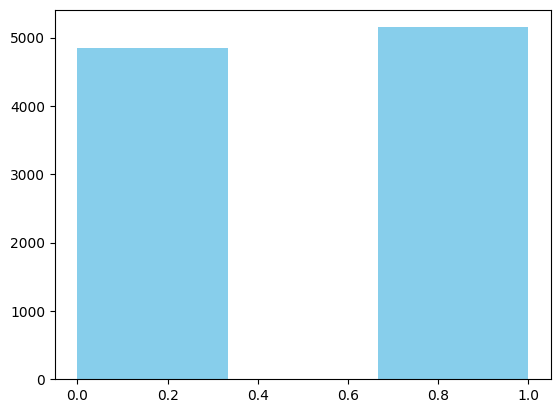

In [25]:
plt.hist(cd['IsActiveMember'], bins=3, color='skyblue');

In [26]:
i = len(cd[(cd['IsActiveMember']==1)&(cd['Exited']==1)])
j = i = len(cd[(cd['IsActiveMember']==0)&(cd['Exited']==1)])
print('Exited being an Active member',i,'which is',i/h[0]*100,'%')
print('Exited not being an Active member',j,'which is',j/h[1]*100,'%')

Exited being an Active member 1302 which is 26.850897092183956 %
Exited not being an Active member 1302 which is 25.276645311589984 %


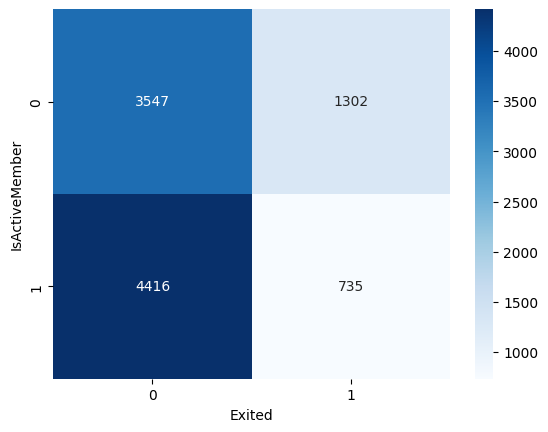

In [72]:
sb.heatmap(pd.crosstab(cd['IsActiveMember'], cd['Exited']), annot=True, fmt='g', cmap='Blues');

In [28]:
pd.crosstab([cd['Geography'],cd['Gender'],cd['HasCrCard']], cd['Exited'])

Exited                         0    1
Geography Gender HasCrCard           
France    Female 0           544  139
                 1          1257  321
          Male   0           686  102
                 1          1717  248
Germany   Female 0           219  131
                 1           526  317
          Male   0           262  106
                 1           688  260
Spain     Female 0           244   74
                 1           614  157
          Male   0           377   61
                 1           829  121

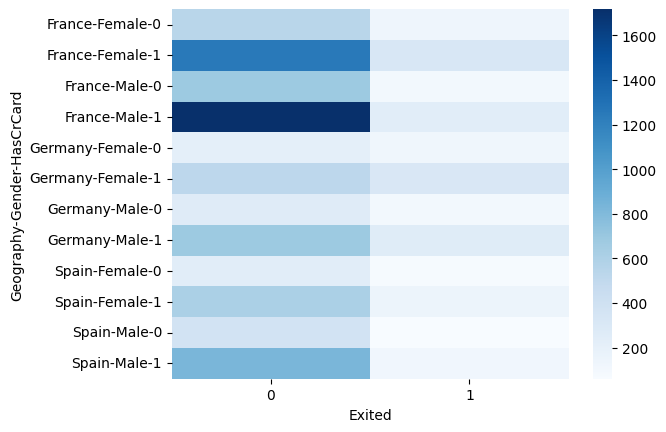

In [73]:
sb.heatmap(pd.crosstab([cd['Geography'],cd['Gender'],cd['HasCrCard']], cd['Exited']), cmap='Blues');

In [30]:
cd['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

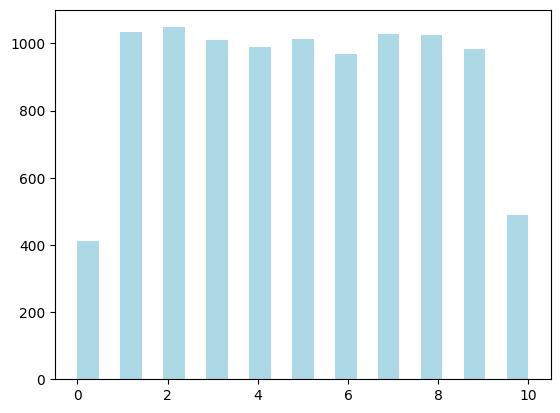

In [31]:
plt.hist(cd['Tenure'],bins=21,color='lightblue');

In [32]:
df_ten = cd[(cd['Tenure']==0) | (cd['Tenure']==10)]
df_others = cd[(cd['Tenure']!=0) | (cd['Tenure']!=10)]

In [33]:
df_ten['Tenure'].value_counts()

10    490
0     413
Name: Tenure, dtype: int64

In [34]:
df_ten = resample(df_ten, replace=True, n_samples = 400)

In [35]:
df = pd.concat([df_ten, df_others])

In [36]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     712
0      591
Name: Tenure, dtype: int64

In [37]:
#df.groupby('Tenure').size().plot(kind='pie', autopct='%1.0f%%');

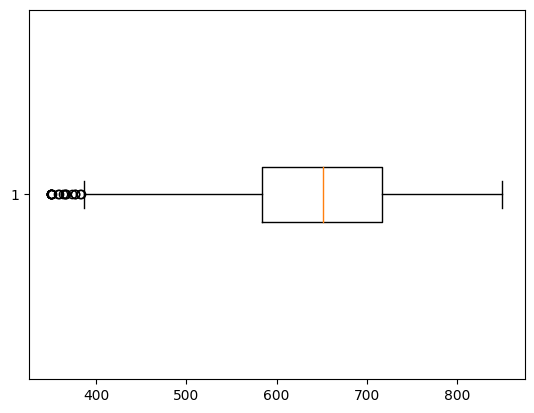

In [38]:
plt.boxplot(df['CreditScore'], vert=0); #outliers are seen to the left of the 400 mark.

In [39]:
df = df[df['CreditScore']>=390]

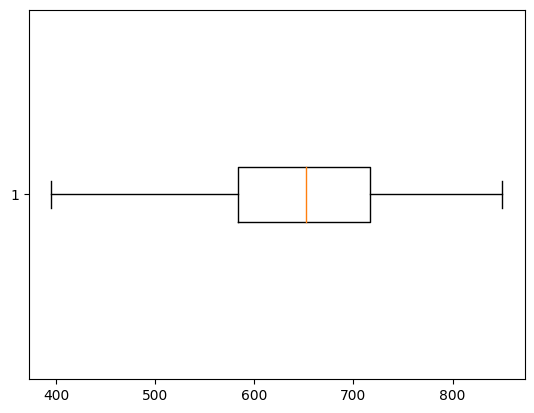

In [40]:
plt.boxplot(df['CreditScore'], vert=0);

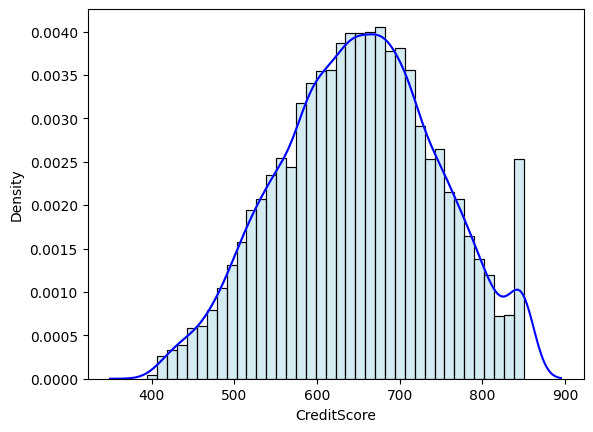

In [41]:
sb.histplot(df['CreditScore'], kde=True, color='lightblue', stat='density')
sb.kdeplot(df['CreditScore'], color='blue');

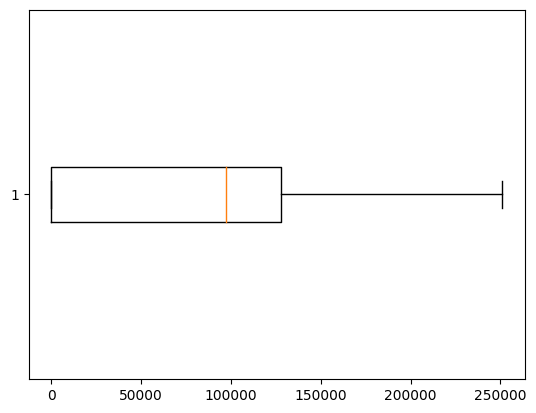

In [42]:
plt.boxplot(df['Balance'], vert=0); #shows negative skewness

In [43]:
df['Balance'].skew()

-0.14269827893982506

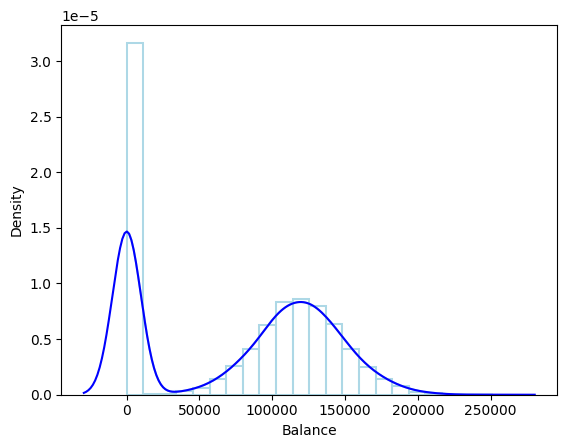

In [44]:
sb.histplot(df['Balance'], kde=True, color='lightblue', stat='density', fill=False)
sb.kdeplot(df['Balance'], color='blue');

In [45]:
a1 = len(df[df['Balance']==0])
b1 = len(df['Balance'])
print("%.2f" %(a1/b1*100),'% of the data has 0 Balance.')

36.07 % of the data has 0 Balance.


In [46]:
df = df[df['Balance']!=0]

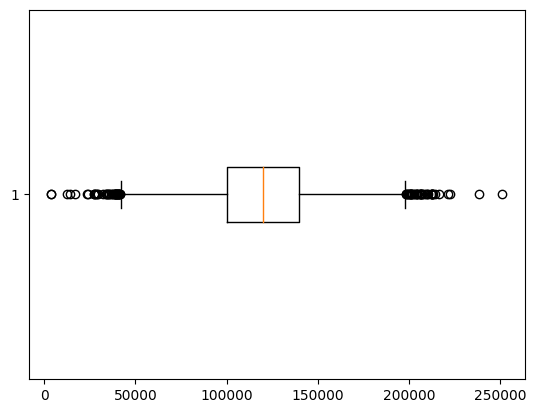

In [47]:
plt.boxplot(df['Balance'], vert=0);

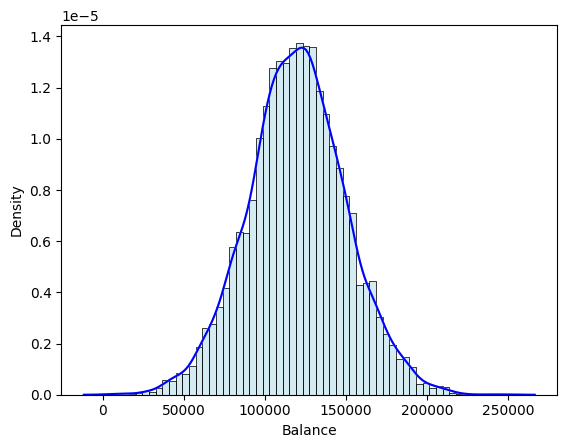

In [48]:
sb.histplot(df['Balance'], kde=True, color='lightblue', stat='density')
sb.kdeplot(df['Balance'], color='blue');

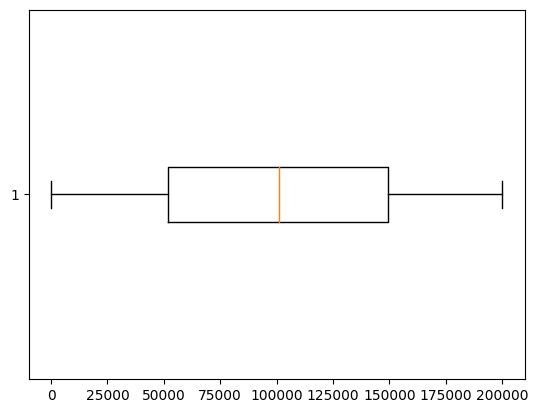

In [49]:
plt.boxplot(df['EstimatedSalary'], vert=0);

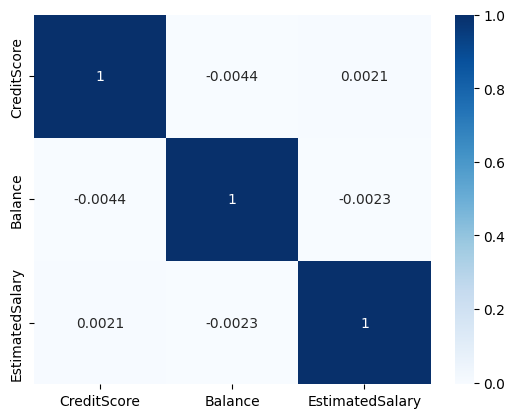

In [50]:
corr = df[['CreditScore','Balance','EstimatedSalary']]
corr = corr.corr()
sb.heatmap(corr, cmap='Blues', annot=True);

In [51]:
df['NumOfProducts'].value_counts()

1    4354
2    2066
3     171
4      45
Name: NumOfProducts, dtype: int64

In [52]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,3240,1114
2,1790,276
3,10,161
4,0,45


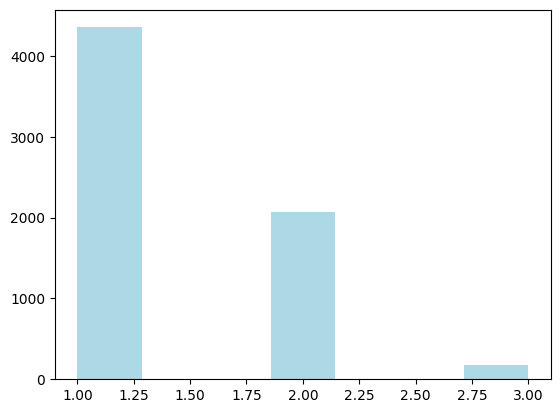

In [80]:
plt.hist(df['NumOfProducts'], bins=7, color='lightblue');

In [54]:
df.drop(df[df['NumOfProducts']==4].index, inplace=True)

In [55]:
df['NumOfProducts'].value_counts()

1    4354
2    2066
3     171
Name: NumOfProducts, dtype: int64

In [56]:
#split into independent and dependent variables from here
x = df.iloc[:,0:10]
y = df.iloc[:,10]

In [57]:
x.shape

(6591, 10)

In [58]:
df_corr = df.corr(numeric_only=True)
df_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.005026,0.001929,-0.006186,0.003729,-0.015231,0.028752,0.002814,-0.019863
Age,-0.005026,1.000000,0.007930,-0.011466,-0.013189,-0.020265,0.064628,-0.011413,0.295377
Tenure,0.001929,0.007930,1.000000,0.003911,0.005379,0.030729,-0.051277,0.006671,0.000474
Balance,-0.006186,-0.011466,0.003911,1.000000,-0.010726,0.006722,-0.019882,-0.001742,0.017014
NumOfProducts,0.003729,-0.013189,0.005379,-0.010726,1.000000,0.003695,0.001312,0.030467,0.021048
HasCrCard,-0.015231,-0.020265,0.030729,0.006722,0.003695,1.000000,-0.019727,-0.004776,0.000133
IsActiveMember,0.028752,0.064628,-0.051277,-0.019882,0.001312,-0.019727,1.000000,-0.011520,-0.172145
EstimatedSalary,0.002814,-0.011413,0.006671,-0.001742,0.030467,-0.004776,-0.011520,1.000000,0.001191
Exited,-0.019863,0.295377,0.000474,0.017014,0.021048,0.000133,-0.172145,0.001191,1.000000


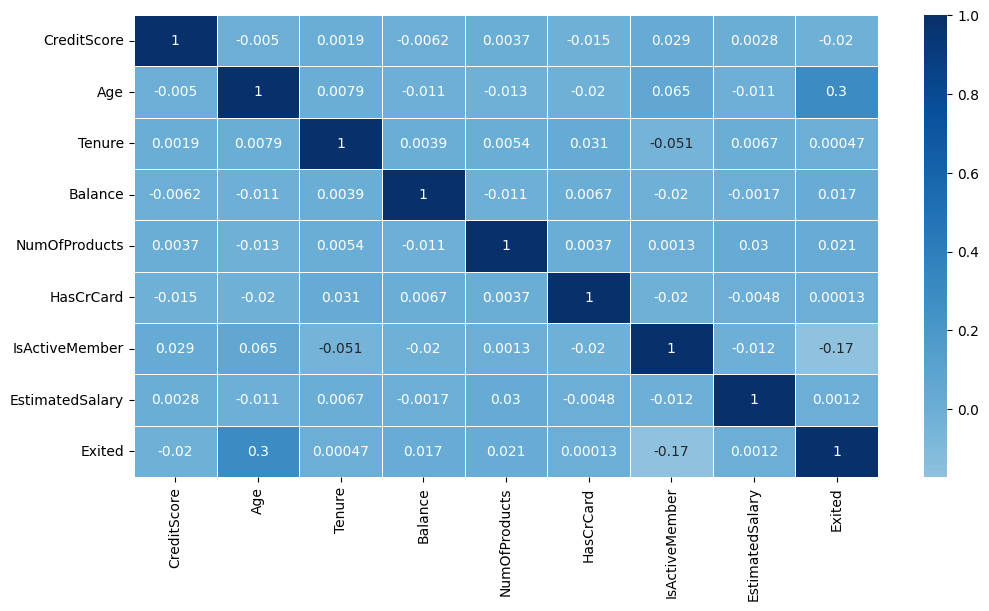

In [81]:
fig,ax = plt.subplots(figsize=(12,6))
sb.heatmap(df_corr, annot=True, linewidths=0.5, center=0, cmap='Blues')
plt.show()

In [60]:
scale = scaler()
x[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = \
scale.fit_transform(x[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3195,0.663736,Germany,Male,0.148649,0,0.683548,1,0,0,0.709082
5150,0.263736,France,Female,0.256757,0,0.781311,1,1,1,0.663928
9495,0.626374,France,Male,0.202703,10,0.728362,1,1,0,0.820706
7253,0.843956,Spain,Female,0.500000,0,0.524127,1,1,0,0.114129
5049,0.854945,Spain,Male,0.270270,10,0.479502,1,0,0,0.728891
...,...,...,...,...,...,...,...,...,...,...
9991,0.443956,France,Female,0.472973,4,0.342381,1,1,0,0.346936
9993,0.547253,France,Male,0.135135,7,0.612196,1,1,0,0.145869
9996,0.265934,France,Male,0.229730,10,0.216894,1,1,1,0.508545
9998,0.828571,Germany,Male,0.324324,3,0.288540,2,1,0,0.464480


In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


# Separate categorical and numerical columns
categorical_columns = ['Geography', 'Gender']  # List of your categorical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember','EstimatedSalary']  # List of your numerical columns

In [62]:
#x_categorical = x.loc[:, categorical_columns]
#x_numerical = x.loc[:, numerical_columns]

# Apply One-Hot Encoding to categorical variables
#encoder = OneHotEncoder()
#x_categorical_encoded = encoder.fit_transform(x_categorical)

# Apply feature scaling to numerical variables
#scaler = StandardScaler()
#x_numerical_scaled = scaler.fit_transform(x_numerical)

# Combine the encoded categorical variables and scaled numerical variables
#x_scaled = np.hstack((x_categorical_encoded.toarray(), x_numerical_scaled))

# Apply PCA and visualize
#n_components = min(x_scaled.shape[1], 10)  # Limit to the number of columns
#pca = PCA(n_components=n_components)
#principal_components = pca.fit_transform(x_scaled)

# Get the explained variance ratios
#explained_variance_ratios = pca.explained_variance_ratio_

#feature_names = list(x.columns)

# Sort the features based on their explained variance ratios
#sorted_features = np.argsort(explained_variance_ratios)[::-1]


# Print the features and their explained variance ratios
#for i, feature_idx in enumerate(sorted_features):
    #print(f"{i+1}. {feature_names[feature_idx]} - Explained Variance Ratio: {explained_variance_ratios[feature_idx]:.4f}")

In [63]:
x = pd.get_dummies(x, columns=['Geography', 'Gender'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3195,0.663736,0.148649,0,0.683548,1,0,0,0.709082,0,1,0,0,1
5150,0.263736,0.256757,0,0.781311,1,1,1,0.663928,1,0,0,1,0
9495,0.626374,0.202703,10,0.728362,1,1,0,0.820706,1,0,0,0,1
7253,0.843956,0.500000,0,0.524127,1,1,0,0.114129,0,0,1,1,0
5049,0.854945,0.270270,10,0.479502,1,0,0,0.728891,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.443956,0.472973,4,0.342381,1,1,0,0.346936,1,0,0,1,0
9993,0.547253,0.135135,7,0.612196,1,1,0,0.145869,1,0,0,0,1
9996,0.265934,0.229730,10,0.216894,1,1,1,0.508545,1,0,0,0,1
9998,0.828571,0.324324,3,0.288540,2,1,0,0.464480,0,1,0,0,1


In [64]:
from sklearn.preprocessing import StandardScaler #fitting standard scaler
x=StandardScaler().fit_transform(x)

In [65]:
cov = (x.T @ x) / (x.shape[0] - 1) #computing the covariance matrix

In [66]:
eig_values, eig_vectors = np.linalg.eig(cov)

In [67]:
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

<ipython-input-68-f6398045b482>:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 4, 1)


(1.0, 4.0)

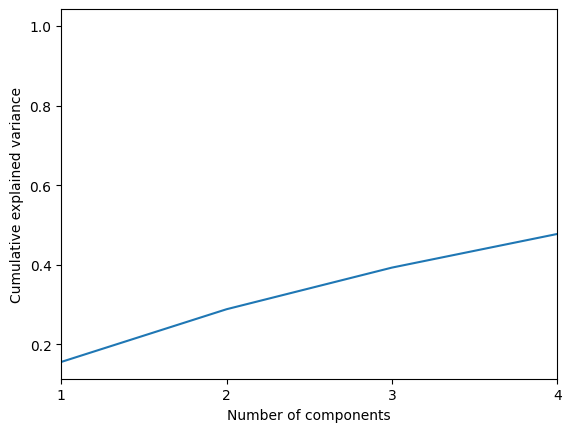

In [68]:
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

In [69]:
eig_scores = np.dot(x, sorted_eig_vectors[:, :2])
colors = ["blue", "red", "green"]


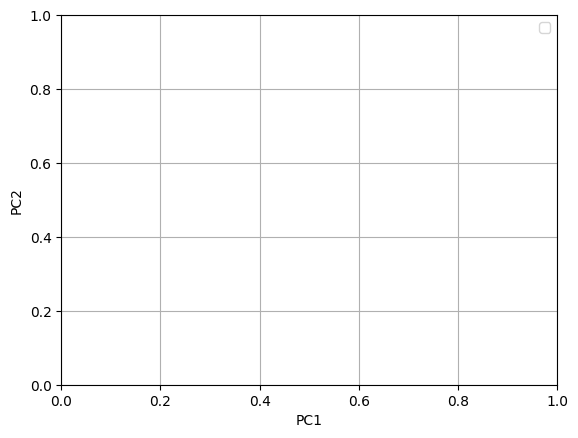

In [70]:
def biplot(score, coeff, labels):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    for i, u in enumerate(cd["target_names"]):
        xi = [
            score[j, 0] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        yi = [
            score[j, 1] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        plt.scatter(xi, yi, c=colors[i], label=u)
    for i in range(n):
        plt.arrow(
            0, 0, coeff[i, 0], coeff[i, 1], color="r", head_width=0.05, head_length=0.1
        )
        plt.text(
            coeff[i, 0] * 1.35,
            coeff[i, 1] * 1.35,
            labels[i],
            color="g",
            ha="center",
            va="center",
        )


plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#biplot(eig_scores, sorted_eig_vectors, cd[" "])
plt.legend()